They're alive! Monsters can move. They're, not smart, but they should be able to catch a wandering hero more often, just from covering more tiles.

In [1]:
import matplotlib.pyplot as plt
from treasure_hunt.environment import BaseTreasureHuntEnv as Environment
from treasure_hunt.agent import SimplifierQLearner
from gymnasium.wrappers import TimeLimit

from treasure_hunt.agent.env_reducer import NearSightedReducer

from treasure_hunt.environment.monster_strategy import RandomMovementStrategy

from treasure_hunt.utils import AdaptiveRLRunner, run_with_render

In [2]:
# Initialize environment and agent
env = TimeLimit(Environment(monster_strategy=RandomMovementStrategy()), 500) # Truncate at 500 steps
agent = SimplifierQLearner(env, NearSightedReducer(env.unwrapped), exploration_decay=.999)

In [3]:
agent.min_exploration_rate=.1

In [4]:
# Setup runner
runner = AdaptiveRLRunner(agent=agent, env=env, total_epochs=1000, target_std_ratio=.5)

In [5]:
# Train the agent
runner.train_agent()

Epoch 1/1000 - Training complete
Epoch 1/1000 - Mean reward: -968.4
Epoch 2/1000 - Training complete
Epoch 2/1000 - Mean reward: -318.4
Epoch 3/1000 - Training complete
Epoch 3/1000 - Mean reward: -451.8
Epoch 4/1000 - Training complete
Epoch 4/1000 - Mean reward: -233.0
Epoch 5/1000 - Training complete
Epoch 5/1000 - Mean reward: -237.6
Epoch 6/1000 - Training complete
Epoch 6/1000 - Mean reward: -122.2
Epoch 7/1000 - Training complete
Epoch 7/1000 - Mean reward: -334.0
Epoch 8/1000 - Training complete
Epoch 8/1000 - Mean reward: -99.0
Epoch 9/1000 - Training complete
Epoch 9/1000 - Mean reward: -207.8
Epoch 10/1000 - Training complete
Adapted evaluation episodes to 6 based on std ratio 2.669846140632729
Epoch 10/1000 - Mean reward: -226.2
Epoch 11/1000 - Training complete
Adapted evaluation episodes to 6 based on std ratio 0.2845326278452101
Epoch 11/1000 - Mean reward: -237.16666666666666
Epoch 12/1000 - Training complete
Adapted evaluation episodes to 7 based on std ratio 0.5558455

/media/khaur/DATA/Workspaces/rl-treasure/treasure_hunt/utils.py:117: RuntimeWarning: divide by zero encountered in scalar divide
  std_ratio = std_inter / std_inner


Epoch 329/1000 - Training complete
Adapted evaluation episodes to 7 based on std ratio 0.6203121098289798
Epoch 329/1000 - Mean reward: 141.33333333333334
Epoch 330/1000 - Training complete
Adapted evaluation episodes to 7 based on std ratio 0.44233590677734214
Epoch 330/1000 - Mean reward: 72.71428571428571
Epoch 331/1000 - Training complete
Adapted evaluation episodes to 7 based on std ratio 0.4474102246175526
Epoch 331/1000 - Mean reward: 73.85714285714286
Epoch 332/1000 - Training complete
Adapted evaluation episodes to 7 based on std ratio 0.4814868602993847
Epoch 332/1000 - Mean reward: 101.71428571428571
Epoch 333/1000 - Training complete
Adapted evaluation episodes to 7 based on std ratio 0.38402707122963503
Epoch 333/1000 - Mean reward: 72.28571428571429
Epoch 334/1000 - Training complete
Adapted evaluation episodes to 7 based on std ratio 0.3550504929821088
Epoch 334/1000 - Mean reward: 130.71428571428572
Epoch 335/1000 - Training complete
Adapted evaluation episodes to 8 bas

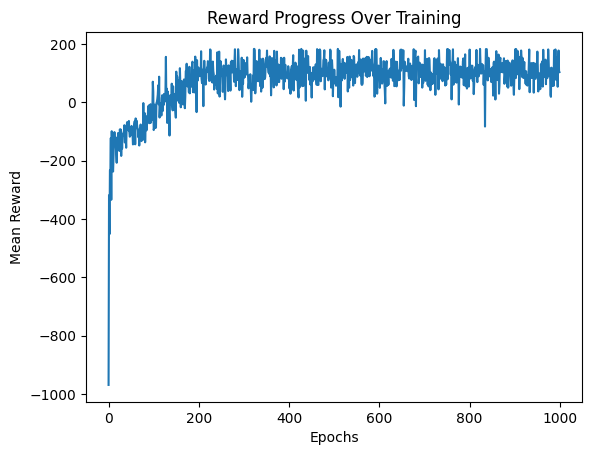

In [6]:
runner.plot_results()

In [7]:
# Evaluate the agent
mean_reward, rewards = agent.evaluate(n_episodes=1000)
print(f"Mean Reward after training: {mean_reward}")

Mean Reward after training: 112.624


In [8]:
len([r for r in runner.reward_history if r < 0])

137

In [9]:
import os
import pickle
from datetime import datetime

runner.save_results()

Results saved to the 'results/qlearner-static/20241227_140219' folder.


In [10]:
# Initialize the environment with 'human' render mode
env_human = Environment(monster_strategy=RandomMovementStrategy(),render_mode="human")

run_with_render(env_human, agent, n_episodes=10)

# Close the environment
env_human.close()

In [11]:
# Extra close in case the cell above crashes
env_human.close()